<a href="https://colab.research.google.com/github/ruthu06/Face-Recognition/blob/main/ML_GROUP13(RAW)_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python dlib imutils


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=30d55f6b209ac11498145f39028d1224d99c04284f143a5b456256afbe709384
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
pip install pyheif

In [ ]:
pip install Pillow


In [ ]:
# @title CONVERT HEIC TO JPEG
import os
import pyheif
from PIL import Image

# Define the directory containing images
input_directory = '/content/drive/MyDrive/Release'

# Loop through files in the input directory
for student_folder in os.listdir(input_directory):
    student_folder_path = os.path.join(input_directory, student_folder)
    for filename in os.listdir(student_folder_path):
       if filename.endswith(".HEIC"):  # Check if the file is a HEIC image
          heic_file_path = os.path.join(student_folder_path, filename)

        # Read the HEIC file
          heif_file = pyheif.read(heic_file_path)

        # Convert HEIC to JPEG
          jpeg_image = Image.frombytes(
            heif_file.mode,
            heif_file.size,
            heif_file.data,
            "raw",
            heif_file.mode,
            heif_file.stride,
        )

        # Define the new file path for the converted JPEG
          jpeg_file_path = os.path.join(student_folder_path, os.path.splitext(filename)[0] + '.jpeg')

        # Save the converted image as JPEG
          jpeg_image.save(jpeg_file_path, 'JPEG', quality=95)

        # Remove the original HEIC file
          os.remove(heic_file_path)
          print(f"File '{filename}' converted and replaced with a JPEG.")


In [ ]:
# @title RE-SIZE
import os
import cv2
import dlib
import pyheif
from imutils import face_utils



# Define the face detector
face_detector = dlib.get_frontal_face_detector()

# Define the path to the main directory containing student subfolders
main_directory = '/content/drive/MyDrive/Release'

# Define the path to the directory where the cropped faces will be stored
output_directory = '/content/drive/MyDrive/resized_photos_RAW'

# Make the output directory if it doesn't already exist
os.makedirs(output_directory, exist_ok=True)


# Loop over all subfolders in the main directory
for student_folder in os.listdir(main_directory):
    student_folder_path = os.path.join(main_directory, student_folder)

    # Continue if not a directory
    if not os.path.isdir(student_folder_path):
        continue

    # Loop over all files in the student subfolder
    for filename in os.listdir(student_folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"): # Add/modify according to your image type
            # Load the image using OpenCV
            img = cv2.imread(os.path.join(student_folder_path, filename))

            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect faces in the grayscale image
            rects = face_detector(gray, 1)

            # Loop over each face detected in the image
            for (i, rect) in enumerate(rects):
                # Convert the face rectangle to a bounding box
                (x, y, w, h) = face_utils.rect_to_bb(rect)

                # Let's add some padding around the face bounding box for capturing more context
                padding = 20 # Adjust this value based on your requirements
                (x, y, w, h) = max(x - padding, 0), max(y - padding, 0), w + padding, h + padding

                # Crop the face out of the image (ensure coordinates are within image bounds)
                face = img[y:min(y + h, img.shape[0]), x:min(x + w, img.shape[1])]

                # Resize the face to desired size
                face_resized = cv2.resize(face, (256, 256))

                # Define the output subfolder path
                output_subfolder_path = os.path.join(output_directory, student_folder)

                # Make the output subfolder if it doesn't already exist
                os.makedirs(output_subfolder_path, exist_ok=True)

                # Save the cropped face
                cv2.imwrite(os.path.join(output_subfolder_path, f"{filename.split('.')[0]}_face_{i}.jpg"), face_resized)


In [ ]:
# @title SVM TRAINING
import os
import face_recognition
from sklearn import svm

# Training the SVC classifier

# The training data would be all the face encodings from all the known images and the labels are their names
encodings = []
names = []

# Training directory
train_dir = os.path.join("/content/drive/MyDrive/resized_photos_RAW")

# Loop through each person in the training directory
for person in os.listdir(train_dir):
    pix = os.listdir(os.path.join(train_dir, person))

    # Loop through each training image for the current person
    for person_img in pix:
        # Get the face encodings for the face in each image file
        face = face_recognition.load_image_file(os.path.join(train_dir, person, person_img))
        face_bounding_boxes = face_recognition.face_locations(face)

        #If training image contains exactly one face
        if len(face_bounding_boxes) == 1:
            face_enc = face_recognition.face_encodings(face)[0]
            # Add face encoding for current image with corresponding label (name) to the training data
            encodings.append(face_enc)
            names.append(person)
        else:
            print(person + "/" + person_img + " was skipped and can't be used for training")

# Create and train the SVC classifier
clf = svm.SVC(gamma='scale')
clf.fit(encodings,names)

Prachi/IMG_8551_face_1.jpg was skipped and can't be used for training
Dheeraj/Dheeraj_cropped_09-26_1_face_1.jpg was skipped and can't be used for training
Dheeraj/Dheeraj_cropped_09-28_3_face_0.jpg was skipped and can't be used for training
Yuhang/week1-2_face_0.jpg was skipped and can't be used for training
Shubham/IMG_8409_face_0.jpg was skipped and can't be used for training
Anirudh/0921-ClassPhotos _face_1.jpg was skipped and can't be used for training


SVC()

faces/42_0.jpeg doesn't contain any faces.
Accuracy:  0.7480314960629921
                 precision    recall  f1-score   support

        Anirudh       1.00      1.00      1.00         4
        Aparnaa       0.57      1.00      0.73         4
           Chen       1.00      1.00      1.00         5
        Dheeraj       1.00      1.00      1.00         3
       Divyanth       1.00      1.00      1.00         5
        Griffin       0.67      1.00      0.80         2
        Haisong       1.00      0.75      0.86         4
        Haochen       1.00      1.00      1.00         4
          Huiyu       0.50      1.00      0.67         5
         Husain       1.00      1.00      1.00         5
        Kimsong       0.00      0.00      0.00         3
        Madhuri       1.00      1.00      1.00         2
          Manya       1.00      1.00      1.00         2
          Peiqi       0.00      0.00      0.00         5
          Pooja       0.62      1.00      0.77         5
         Prach

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


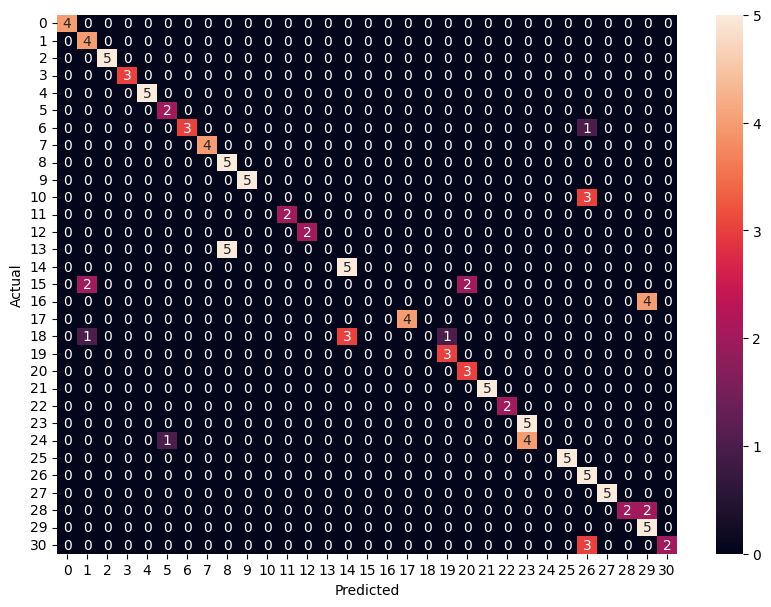

In [ ]:
# @title SVM TESTING
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import re

def numerical_sort(file_name):
    numbers = re.findall(r'\d+', file_name)
    if numbers:
        return int(numbers[0])
    return 0

# Testing directory
test_dir = ("/content/drive/MyDrive/COEN240")


# Loop through each person in the testing directory
test_encodings = []
test_names = []
for person in os.listdir(test_dir):
    if person == ".DS_Store":
        continue
    person_dir = os.path.join(test_dir, person)
    if os.path.isdir(person_dir):
        pix = os.listdir(person_dir)
        pix.sort(key=numerical_sort)
        # Loop through each training image for the current person
        with open('/content/drive/MyDrive/labels.txt', 'r') as file:
          filename=os.path.join(person_dir,".DS_Store")
          filename2=os.path.join(person_dir,"labels.txt")
          for line, person_img in zip(file, pix):
            if os.path.exists(filename):
                os.remove(filename)
            if os.path.exists(filename2):
                os.remove(filename2)
            # Get the face encodings for the face in each image file
            face = face_recognition.load_image_file(os.path.join(person_dir, person_img))
            face_bounding_boxes = face_recognition.face_locations(face)
            #image = cv2.imread(os.path.join(person_dir, person_img))

            # If there are faces in the image
            if len(face_bounding_boxes) >= 1:
                # Iterate over each face in the image
                for i in range(len(face_bounding_boxes)):
                    face_enc = face_recognition.face_encodings(face)[i]
                    # Add face encoding for current image with corresponding label (name) to the training data
                    test_encodings.append(face_enc)
                    # Split the line at the dot ('.') and take the second part (the name)
                    # Also, strip any leading/trailing whitespaces
                    name = line.split()[1].strip()
                    # Add the name to the array
                    test_names.append(name)

            else:
                print(person + "/" + person_img + " doesn't contain any faces.")



'''# Open the file and read it line by line
with open('/content/drive/MyDrive/labels.txt', 'r') as file:
    for line in file:
        # Split the line at the dot ('.') and take the second part (the name)
        # Also, strip any leading/trailing whitespaces
        name = line.split()[1].strip()
        # Add the name to the array
        test_names.append(name)

# Print the array to verify the results
#print(names)
pred_names = clf.predict(test_encodings)
#print(pred_names)
#print(test_names)
images_dir = "/content/drive/MyDrive/Testing2/faces"
image_files = os.listdir(images_dir)
image_files.sort(key=numerical_sort)

for name, img in zip(pred_names, image_files):
    image_path = os.path.join(images_dir, img)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()
    print(name)
#print(pred_names)'''

pred_names = clf.predict(test_encodings)

# Calculate accuracy
accuracy = accuracy_score(test_names, pred_names)
print("Accuracy: ", accuracy)

# Generate classification report
print(classification_report(test_names, pred_names))

# Generate confusion matrix
cm = confusion_matrix(test_names, pred_names, labels=np.unique(test_names))
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best score for data: 0.9228492136910269
Best C: 1
Best Kernel: rbf
Best Gamma: 10
Accuracy:  0.9133858267716536
                 precision    recall  f1-score   support

        Anirudh       1.00      1.00      1.00         4
        Aparnaa       1.00      1.00      1.00         4
           Chen       1.00      1.00      1.00         5
        Dheeraj       1.00      1.00      1.00         3
       Divyanth       1.00      1.00      1.00         5
        Griffin       1.00      1.00      1.00         2
        Haisong       1.00      1.00      1.00         4
        Haochen       1.00      1.00      1.00         4
          Huiyu       1.00      1.00      1.00         5
         Husain       1.00      1.00      1.00         5
        Kimsong       1.00      0.67      0.80         3
        Madhuri       1.00      1.00      1.00         2
          Manya       1.00      1.00      1.00         2
          Peiqi       1.00      1.00      1.00         5
          Pooja       0.50      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


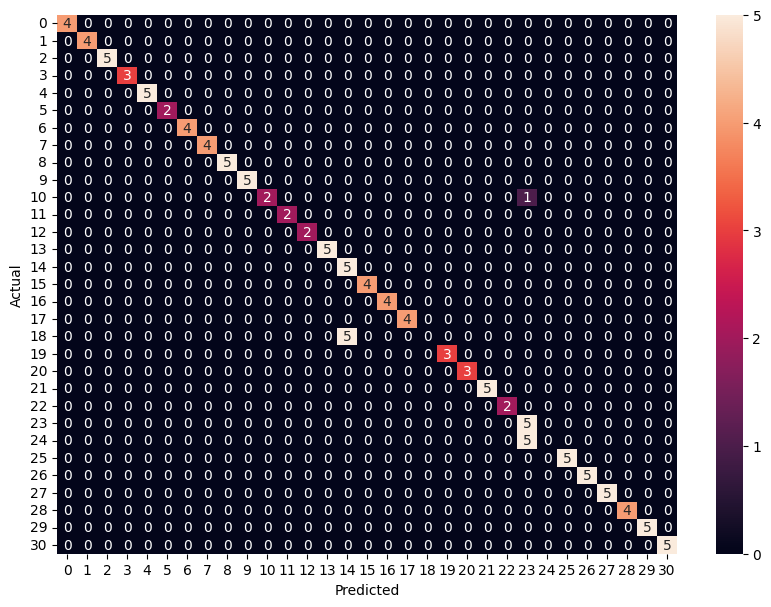

In [ ]:
# @title svm with hyperparameter tuning
from sklearn import svm
from sklearn.model_selection import GridSearchCV
# Parameter grid
param_grid = [
  {'C': [0.001, 0.01, 1], 'kernel': ['linear']},
  {'C': [0.001, 0.01, 1], 'gamma': [1, 10, 100], 'kernel': ['rbf']},
]





# Create a classifier object with the classifier and parameter candidates
grid = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=5)

# Train the classifier on data's feature and target data
grid.fit(encodings, names)

# View the accuracy score
print('Best score for data:', grid.best_score_)

# View the best parameters for the model found using grid search
print('Best C:',grid.best_estimator_.C)
print('Best Kernel:',grid.best_estimator_.kernel)
print('Best Gamma:',grid.best_estimator_.gamma)

# Predict labels for the test dataset
pred_names = grid.predict(test_encodings)

# Calculate accuracy
accuracy = accuracy_score(test_names, pred_names)
print("Accuracy: ", accuracy)

# Generate classification report
print(classification_report(test_names, pred_names))

# Generate confusion matrix
cm = confusion_matrix(test_names, pred_names, labels=np.unique(test_names))
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

faces/42_0.jpeg doesn't contain any faces.
Accuracy:  0.905511811023622
                 precision    recall  f1-score   support

        Anirudh       0.50      1.00      0.67         4
        Aparnaa       0.80      1.00      0.89         4
           Chen       1.00      1.00      1.00         5
        Dheeraj       1.00      1.00      1.00         3
       Divyanth       0.83      1.00      0.91         5
        Griffin       1.00      1.00      1.00         2
        Haisong       0.67      1.00      0.80         4
        Haochen       1.00      1.00      1.00         4
          Huiyu       1.00      1.00      1.00         5
         Husain       1.00      1.00      1.00         5
        Kimsong       1.00      0.33      0.50         3
        Madhuri       0.67      1.00      0.80         2
          Manya       1.00      1.00      1.00         2
          Peiqi       1.00      1.00      1.00         5
          Pooja       0.83      1.00      0.91         5
         Prachi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


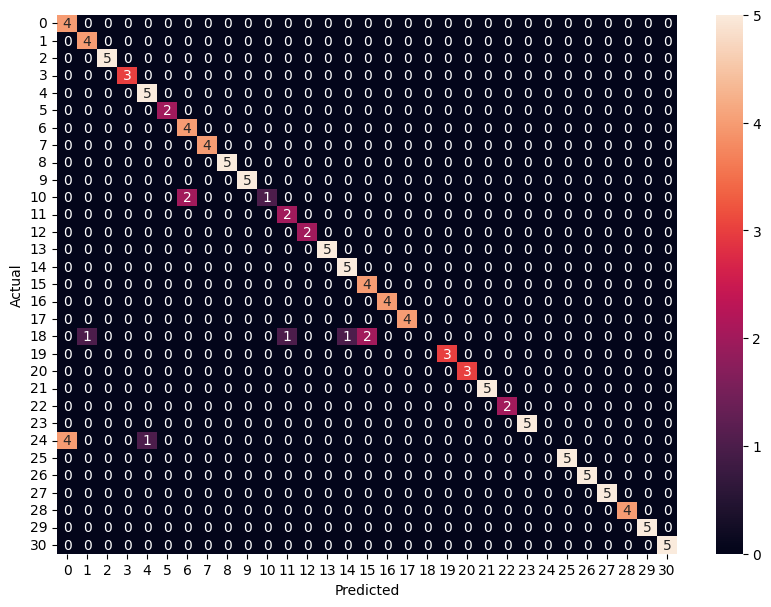

In [ ]:
# @title KNN
# Create and train the kNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(encodings, names)
def numerical_sort(file_name):
    numbers = re.findall(r'\d+', file_name)
    if numbers:
        return int(numbers[0])
    return 0


# Testing directory
test_dir = os.path.join("/content/drive/MyDrive/COEN240")

# Loop through each person in the testing directory
test_encodings = []
test_names = []
for person in os.listdir(test_dir):
    if person == ".DS_Store":
        continue
    person_dir = os.path.join(test_dir, person)
    if os.path.isdir(person_dir):
        pix = os.listdir(person_dir)
        pix.sort(key=numerical_sort)

        # Loop through each training image for the current person
        with open('/content/drive/MyDrive/labels.txt', 'r') as file:
          for line, person_img in zip(file, pix):
            # Get the face encodings for the face in each image file
            face = face_recognition.load_image_file(os.path.join(person_dir, person_img))
            face_bounding_boxes = face_recognition.face_locations(face)
            #image = cv2.imread(os.path.join(person_dir, person_img))

            # If there are faces in the image
            if len(face_bounding_boxes) >= 1:
                # Iterate over each face in the image
                for i in range(len(face_bounding_boxes)):
                    face_enc = face_recognition.face_encodings(face)[i]
                    # Add face encoding for current image with corresponding label (name) to the training data
                    test_encodings.append(face_enc)
                    # Split the line at the dot ('.') and take the second part (the name)
                    # Also, strip any leading/trailing whitespaces
                    name = line.split()[1].strip()
                    # Add the name to the array
                    test_names.append(name)

            else:
                print(person + "/" + person_img + " doesn't contain any faces.")

# Predict labels for the test dataset
pred_names = knn.predict(test_encodings)
'''test_names = []

# Open the file and read it line by line
with open('/content/drive/MyDrive/labels.txt', 'r') as file:
    for line in file:
        # Split the line at the dot ('.') and take the second part (the name)
        # Also, strip any leading/trailing whitespaces
        name = line.split()[1].strip()
        # Add the name to the array
        test_names.append(name)'''

# Calculate accuracy
accuracy = accuracy_score(test_names, pred_names)
print("Accuracy: ", accuracy)

# Generate classification report
print(classification_report(test_names, pred_names))

# Generate confusion matrix
cm = confusion_matrix(test_names, pred_names, labels=np.unique(test_names))
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy:  0.952755905511811
                 precision    recall  f1-score   support

        Anirudh       1.00      1.00      1.00         4
        Aparnaa       0.67      1.00      0.80         4
           Chen       1.00      1.00      1.00         5
        Dheeraj       1.00      1.00      1.00         3
       Divyanth       1.00      1.00      1.00         5
        Griffin       1.00      1.00      1.00         2
        Haisong       1.00      1.00      1.00         4
        Haochen       1.00      1.00      1.00         4
          Huiyu       1.00      1.00      1.00         5
         Husain       1.00      1.00      1.00         5
        Kimsong       1.00      1.00      1.00         3
        Madhuri       0.67      1.00      0.80         2
          Manya       0.67      1.00      0.80         2
          Peiqi       1.00      1.00      1.00         5
          Pooja       0.83      1.00      0.91         5
         Prachi       1.00      1.00      1.00         4
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


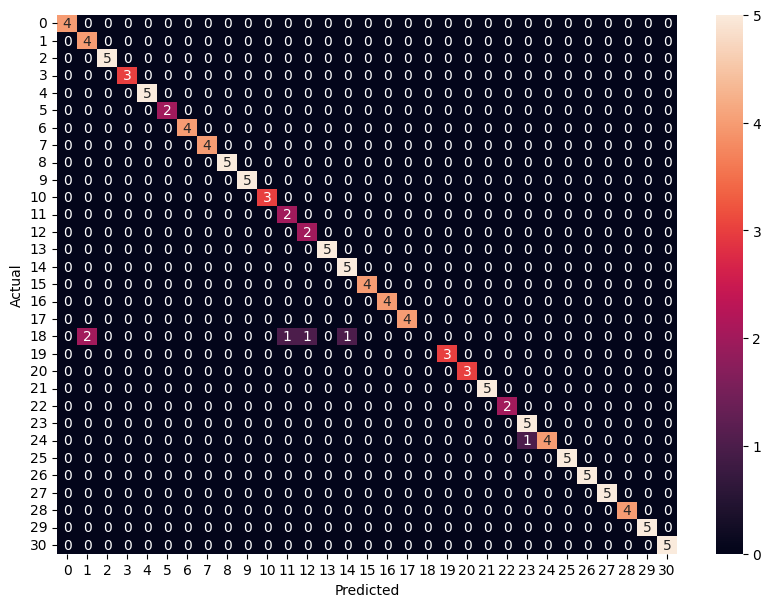

In [ ]:
# @title RANDOM FOREST
# Create and train the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(encodings, names)

# Testing directory
test_dir = os.path.join("/content/drive/MyDrive/COEN240")
def numerical_sort(file_name):
    numbers = re.findall(r'\d+', file_name)
    if numbers:
        return int(numbers[0])
    return 0


# Loop through each person in the testing directory
test_encodings = []
test_names = []
for person in os.listdir(test_dir):
    if person == ".DS_Store":
        continue
    person_dir = os.path.join(test_dir, person)
    if os.path.isdir(person_dir):
        pix = os.listdir(person_dir)
        pix.sort(key=numerical_sort)

    with open('/content/drive/MyDrive/labels.txt', 'r') as file:
          for line, person_img in zip(file, pix):
            # Get the face encodings for the face in each image file
            face = face_recognition.load_image_file(os.path.join(person_dir, person_img))
            face_bounding_boxes = face_recognition.face_locations(face)
            #image = cv2.imread(os.path.join(person_dir, person_img))

            # If there are faces in the image
            if len(face_bounding_boxes) >= 1:
                # Iterate over each face in the image
                for i in range(len(face_bounding_boxes)):
                    face_enc = face_recognition.face_encodings(face)[i]
                    # Add face encoding for current image with corresponding label (name) to the training data
                    test_encodings.append(face_enc)
                    # Split the line at the dot ('.') and take the second part (the name)
                    # Also, strip any leading/trailing whitespaces
                    name = line.split()[1].strip()
                    # Add the name to the array
                    test_names.append(name)


# Predict labels for the test dataset
pred_names = rf.predict(test_encodings)
'''test_names = []

# Open the file and read it line by line
with open('/content/drive/MyDrive/labels.txt', 'r') as file:
    for line in file:
        # Split the line at the dot ('.') and take the second part (the name)
        # Also, strip any leading/trailing whitespaces
        name = line.split()[1].strip()
        # Add the name to the array
        test_names.append(name)'''

# Calculate accuracy
accuracy = accuracy_score(test_names, pred_names)
print("Accuracy: ", accuracy)

# Generate classification report
print(classification_report(test_names, pred_names))

# Generate confusion matrix
cm = confusion_matrix(test_names, pred_names, labels=np.unique(test_names))
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# @title take_photo function call
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import os

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])

    # Define the directory to save the images
    image_dir = 'captured_images'

    # Create the directory if it doesn't exist
    os.makedirs(image_dir, exist_ok=True)

    # Save the image to the directory with a unique filename
    image_filename = os.path.join(image_dir, filename)
    with open(image_filename, 'wb') as f:
        f.write(binary)

    return image_filename

In [ ]:
# @title CAPTURE PHOTO
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  #display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to captured_images/photo.jpg


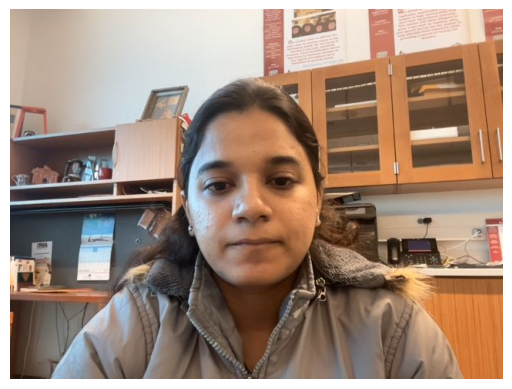

Prachi


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(encodings, names)

# Testing directory
test_dir = ("/content/captured_images")
test_encodings = []
test_names = []
test_files = os.listdir(test_dir)
for person_img in test_files:
            # Get the face encodings for the face in each image file
            face = face_recognition.load_image_file(os.path.join(test_dir,person_img))
            face_bounding_boxes = face_recognition.face_locations(face)
            #image = cv2.imread(os.path.join(person_dir, person_img))

            # If there are faces in the image
            if len(face_bounding_boxes) >= 1:
                # Iterate over each face in the image
                for i in range(len(face_bounding_boxes)):
                    face_enc = face_recognition.face_encodings(face)[i]
                    # Add face encoding for current image with corresponding label (name) to the training data
                    test_encodings.append(face_enc)
                    #test_names.append(person)

            else:
                print(person + "/" + person_img + " doesn't contain any faces.")

# Predict labels for the test dataset
pred_names = knn.predict(test_encodings)
images_dir = "/content/captured_images"
image_files = os.listdir(images_dir)
for name, img in zip(pred_names, image_files):
    image_path = os.path.join(images_dir, img)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()
    print(name)